### Regularized logistic regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [4]:
# getData
data = np.loadtxt("ex2data2.txt", dtype = np.float, delimiter = ',')
data

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [91]:
# processing data
x = data[:, :2]
y = data[:, 2]
index_0 = np.where(y == 0)
index_1 = np.where(y == 1)
xn = x[index_0]
xp = x[index_1]
m = np.size(x, axis=0)

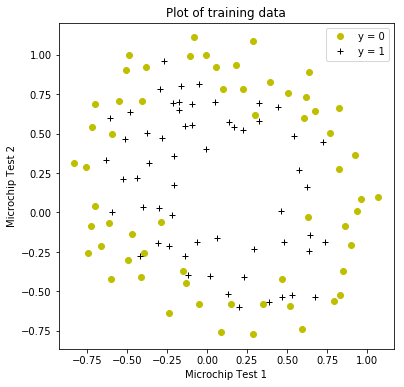

In [92]:
# Visualizing the data
plt.figure(figsize = (6, 6))
plt.plot(xn[:, 0], xn[:, 1], 'yo', xp[:,0], xp[:,1],'k+')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Plot of training data")
plt.legend(["y = 0", "y = 1"], loc = "upper right")
plt.show()

In [93]:
# Feature mapping, Returns a new feature array with more features, comprising of x1, x2, x1^2, X2^2, x1*x2, x1*x2^2, etc...
# 注：x1, x2 均为n行1列的二位array类型
def mapFeature(x1, x2):
    degree = 6
    m = x1.shape[0]
    out = np.ones(m).reshape((m, 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, pow(x1,i-j) * pow(x2, j)))  # 即 out = np.concatenate((out, x[:,:1]),axis = 1)
    return out

In [94]:
X = mapFeature(x[:, :1], x[:, 1:])
n = np.size(X, axis = 1)   # 或 n = np.shape(X)[1] 或 n = X.shape[1]
initial_theta = np.zeros(n)
initial_theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
# Sigmoid function
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [96]:
# Regularized cost function 
def CostFunctionReg(theta, X, y, lam):  # lam 即正则化因子lambda
    m = X.shape[0]
    h = sigmoid(np.dot(X,theta))
    J = np.sum((- y * np.log(h) - (1-y) * np.log(1-h)))/m + (lam/(2*m))*np.sum(theta[1:]**2) # 注：theta[0]不要正则化 
    return J

In [246]:
# Set regularization parameter (设置正则化参数lambda)
lam = 1
CostFunctionReg(initial_theta, X, y, lam)

0.6931471805599454

In [247]:
# Gradient function
def gradient(theta, X, y, lam):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * np.dot((h - y), X[:,0])
    grad = np.append(grad, (1/m) * np.dot((h - y), X[:, 1:]) + (lam/m) * theta[1:])
    return grad

In [248]:
gradient(initial_theta, X, y, lam)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [249]:
result = op.minimize(fun = CostFunctionReg, x0 = initial_theta, args = (X, y, lam), method = 'TNC',jac = gradient)
print(result)

     fun: 0.5290027299645208
     jac: array([-2.15071992e-06,  6.79359459e-07, -3.49072598e-07,  8.75982124e-07,
       -4.08054205e-08, -9.34022573e-07, -5.14575269e-07,  1.70746592e-08,
        1.53297389e-08, -9.72762117e-07,  6.96261174e-08,  3.54843313e-08,
       -2.79852669e-07,  1.79699656e-07,  2.33059220e-07,  1.47152552e-07,
       -2.12092714e-07,  6.16827296e-07, -9.25931557e-08, -5.27709845e-08,
       -1.48174275e-06,  2.31290706e-07,  1.80408916e-07, -1.31376054e-07,
       -7.17988117e-08, -4.12184971e-07,  1.66367342e-08, -7.35013215e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271027,  0.62529965,  1.18111687, -2.019874  , -0.91743189,
       -1.43166931,  0.12393227, -0.36553118, -0.35725405, -0.17516292,
       -1.45817009, -0.05098418, -0.61558557, -0.27469165, -1.19271298,
       -0.24217841, -0.20603302, -0.04466177, -0.27778947, -0.29539513,
       -0.45645982, -1.04319154,  0.027793

In [250]:
#准确度计算(Accuracy)
res = 0
for i in range(m):
    if sigmoid(np.dot(X[i, :], result.x)) >= 0.5:
        p = 1
    else:
        p = 0
    if p == y[i]:
        res += 1
print("Train Accuracy: {:%}".format(res/m))

Train Accuracy: 83.050847%


In [251]:
# x1, x2 为数字float类型，返回一维array类型
def mapFeature1D(x1, x2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.append(out, np.array([pow(x1,i-j) * pow(x2, j)]))
    return out
mapFeature1D(2,3).shape

(28,)

z = f(x,y) 为三维空间曲面，函数np.contour(x, y, z, [0]) 绘制其在Z轴的等高线（投影线），0表示 z = 0 时的等高线

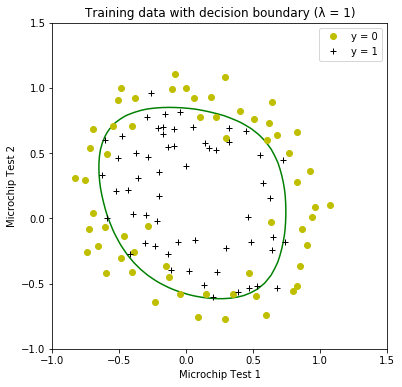

In [255]:
# Plotting the decision boundary
plt.figure(figsize = (6, 6))
plt.plot(xn[:, 0], xn[:, 1], 'yo', xp[:,0], xp[:,1],'k+')

x1 = np.linspace(-1, 1.5, 50)
x2 = np.linspace(-1, 1.5, 50)
x11, x22 = np.meshgrid(x1, x2)  #x11, x22 的shape均为 （50， 50）
z = np.zeros((50, 50))
'''
for i in range(50):
    for j in range(50):
        z[j, i] = np.sum(np.dot(mapFeature1D(x1[i], x2[j]), result.x))  # 注意：这里应该是 z[j, i] 而不是在 z[i, j]

'''
for i in range(50):
    z[:, i] = np.dot(mapFeature(np.full((50,1),x1[i]), x2.reshape((50, 1))), result.x)

plt.contour(x11, x22, z, [0,], colors = 'g')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Training data with decision boundary (λ = 1)")
plt.legend(["y = 0", "y = 1", "Decision boundary"], loc = "upper right")
plt.show()

In [113]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N+1* automatically chosen contour levels
    (*N* intervals).
    
    ::
    
      contour(Z,V)
      contour(X,Y

### 关于 [plt.meshgrid()](https://blog.csdn.net/lllxxq141592654/article/details/81532855) 和 [plt.contour()](https://blog.csdn.net/Mr_Cat123/article/details/80677525) 的一些例子


In [133]:
# array 类型赋值操作
a = np.zeros((5,5))
b = np.array([1,2,3,4,5]).reshape((5,1))
a[:,:1] = b
a

array([[1., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0.]])

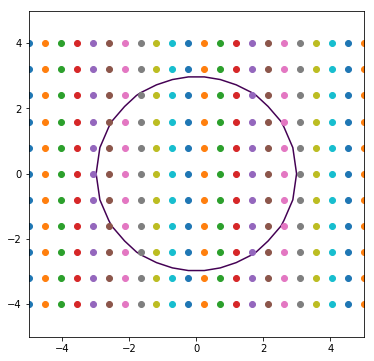

In [221]:
a = np.linspace(-5,5,22)
b = np.linspace(-4,4,11)
aa, bb = np.meshgrid(a, b) # aa, bb 的shape均为 (11, 22)，即11行22列，
# a 的元素个数成为列数（横坐标采样点数），b 的元素个数成为行数（纵坐标采样点数）

#c = aa**2 + bb**2
c = np.zeros((11, 22))
for i in range(22):
    for j in range(11):
        c[j,i] = a[i]**2 + b[j]**2  # a 的元素个数成为列数（横坐标采样点数），b 的元素个数成为行数（纵坐标采样点数）
        
plt.figure(figsize = (6,6))
plt.axis([-5, 5, -5, 5])    # 等同于 plt.xlim((-5, 5)); plt.ylim((-2, 2))。注：plt.axis() 还有更多用法
plt.plot(aa, bb, 'o')
plt.contour(aa, bb, c, [9])
plt.show()